## 1. Gera informação fictícia

In [40]:
import csv
import random
from faker import Faker

fake = Faker()

produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D']
categorias = ['Categoria 1', 'Categoria 2', 'Categoria 3', 'Categoria 2']
localidades = ['Cidade A', 'Cidade B', 'Cidade C']
metodos_pagamento = ['Cartão de Crédito', 'Dinheiro', 'Transferência', 'Pix']

def generate_random_data(num_rows):
    data = []
    for _ in range(num_rows):
        data_de_venda = fake.date_between(start_date='-1y', end_date='today')
        produto = random.choice(produtos) if random.random() > 0.1 else ''
        categoria = random.choice(categorias) if random.random() > 0.1 else None
        preco = round(random.randrange(10, 1000), 2) if random.random() > 0.1 else 'N/A'
        quantidade_vendida = random.randint(1, 50) if random.random() > 0.1 else ''
        localidade = random.choice(localidades) if random.random() > 0.1 else 'Desconhecida'
        metodo_pagamento = random.choice(metodos_pagamento) if random.random() > 0.1 else 'Invalido'

        data.append([
            data_de_venda,
            produto,
            categoria,
            preco,
            quantidade_vendida,
            localidade,
            metodo_pagamento
        ])

    return data

num_rows = 100000
random_data = generate_random_data(num_rows)

csv_file_path = 'vendas_random.csv'
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Data de venda', 'Produto', 'Categoria', 'Preço', 'Quantidade Vendida', 'Localidade', 'Método de Pagamento'])
    writer.writerows(random_data)


# 2. Limpeza de Dados


In [50]:
import pandas as pd

data = pd.read_csv('vendas_random.csv')

data.select_dtypes(include=['object']).fillna('Desconhecido', inplace=True)
data

,Data de venda,Produto,Categoria,Preço,Quantidade Vendida,Localidade,Método de Pagamento
0,2024-08-10,Produto D,Categoria 2,126.0,45.0,Cidade A,Pix
1,2024-06-14,Produto C,NaN,482.0,24.0,Cidade B,Invalido
2,2024-08-15,Produto A,Categoria 2,952.0,31.0,Cidade A,Invalido
3,2024-08-14,Produto D,NaN,395.0,49.0,Cidade C,Pix
4,2023-12-20,Produto D,Categoria 3,636.0,35.0,Cidade A,Dinheiro
...,...,...,...,...,...,...,...
99995,2023-09-27,Produto B,Categoria 3,309.0,6.0,Cidade B,Dinheiro
99996,2024-06-25,Produto B,Categoria 1,84.0,18.0,Cidade C,Transferência
99997,2024-02-20,Produto D,Categoria 1,NaN,NaN,Cidade C,Cartão de Crédito
99998,2023-12-18,NaN,Categoria 2,203.0,NaN,Cidade A,Pix


# 3. Análise Estatística

Média, mediana, desvio padrão e valores máximos e mínimos para o preço do produto


In [53]:
import numpy as np

preco_media = np.nanmean(data['Preço'])
preco_mediana = np.nanmedian(data['Preço'])
preco_desvio_padrao = np.std(data['Preço'])
preco_maximo = np.max(data['Preço'])
preco_minimo = np.min(data['Preço'])

print("Estatísticas para Preço:")
print(f"Média: {preco_media:.2f}, Mediana: {preco_mediana:.2f}, Desvio Padrão: {preco_desvio_padrao:.2f}, Máximo: {preco_maximo:.2f}, Mínimo: {preco_minimo:.2f}")

Estatísticas para Preço:
Média: 504.32, Mediana: 504.00, Desvio Padrão: 285.53, Máximo: 999.00, Mínimo: 10.00


Média, mediana, desvio padrão e valores máximos e mínimos para a quantidade de itens vendidos


In [54]:

quantidade_media = np.nanmean(data['Quantidade Vendida'])
quantidade_mediana = np.nanmedian(data['Quantidade Vendida'])
quantidade_desvio_padrao = np.std(data['Quantidade Vendida'])
quantidade_maximo = np.max(data['Quantidade Vendida'])
quantidade_minimo = np.min(data['Quantidade Vendida'])

print("\nEstatísticas para Quantidade Vendida:")
print(f"Média: {quantidade_media:.2f}, Mediana: {quantidade_mediana:.2f}, Desvio Padrão: {quantidade_desvio_padrao:.2f}, Máximo: {quantidade_maximo:.2f}, Mínimo: {quantidade_minimo:.2f}")


Estatísticas para Quantidade Vendida:
Média: 25.50, Mediana: 25.00, Desvio Padrão: 14.47, Máximo: 50.00, Mínimo: 1.00


# 4. Agrupamento e Segmentação de Dados

Agrupar as vendas por categoria de produto e calcular a soma total de vendar por categoria

In [55]:
data['Total Vendas'] = data['Quantidade Vendida'] * data['Preço']
vendas_por_categoria = data.groupby('Categoria')['Total Vendas'].sum().reset_index()
vendas_por_categoria

,Categoria,Total Vendas
0,Categoria 1,235859907.0
1,Categoria 2,467658702.0
2,Categoria 3,233279701.0


Segmentar dados por localidade e observar onde ocorrem mais vendas

In [58]:
vendas_por_localidade = data.groupby('Localidade')['Quantidade Vendida'].sum().reset_index()
vendas_por_localidade

,Localidade,Quantidade Vendida
0,Cidade A,683740.0
1,Cidade B,693999.0
2,Cidade C,691552.0
3,Desconhecida,227794.0


# 5. Visualização dos dados

Vendas por categoria de produto:

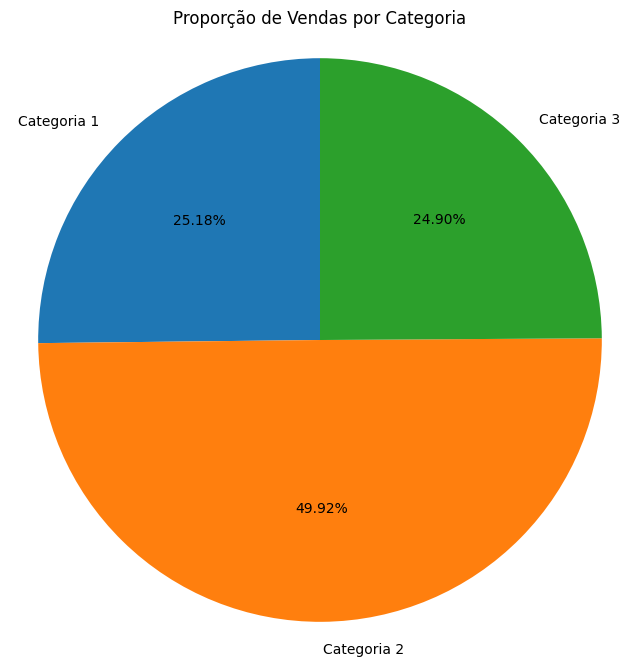

In [62]:
import matplotlib.pyplot as plt

data['total_vendas'] = data['Preço'] * data['Quantidade Vendida']

vendas_por_categoria = data.groupby('Categoria')['total_vendas'].sum()

plt.figure(figsize=(8,8))
plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.2f%%', startangle=90)
plt.title('Proporção de Vendas por Categoria')
plt.axis('equal')
plt.show()

Distribuição de vendas ao longo do tempo:

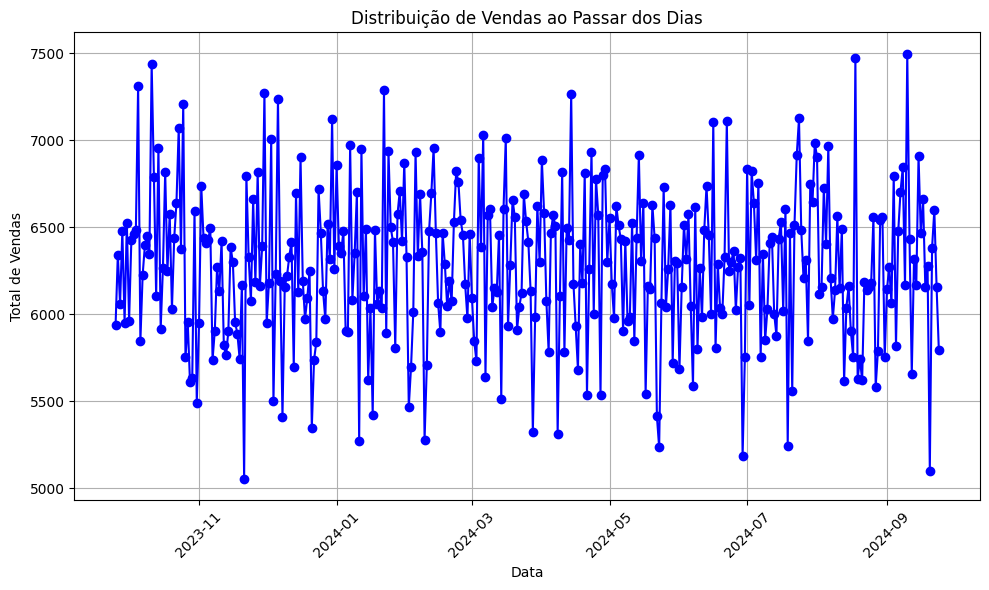

In [63]:
# Converter a coluna 'data' para o formato datetime
data['data'] = pd.to_datetime(data['Data de venda'])

# Agrupar as vendas por dia (somar vendas de cada dia)
vendas_por_dia = data.groupby('data')['Quantidade Vendida'].sum()

# Gerar o gráfico de linha para mostrar a evolução das vendas ao longo dos dias
plt.figure(figsize=(10,6))
plt.plot(vendas_por_dia.index, vendas_por_dia.values, marker='o', linestyle='-', color='blue')
plt.title('Distribuição de Vendas ao Passar dos Dias')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparação das vendas por metodos de pagamento:

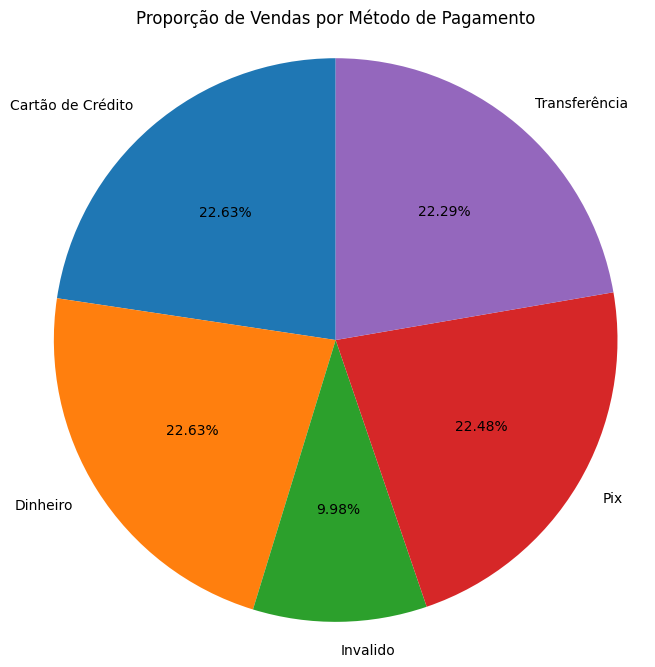

In [64]:
import matplotlib.pyplot as plt

data['total_vendas'] = data['Preço'] * data['Quantidade Vendida']

vendas_por_metodo_pagamento = data.groupby('Método de Pagamento')['total_vendas'].sum()

plt.figure(figsize=(8,8))
plt.pie(vendas_por_categoria, labels=vendas_por_metodo_pagamento.index, autopct='%1.2f%%', startangle=90)
plt.title('Proporção de Vendas por Método de Pagamento')
plt.axis('equal')
plt.show()

Comparação das vendas por localidade

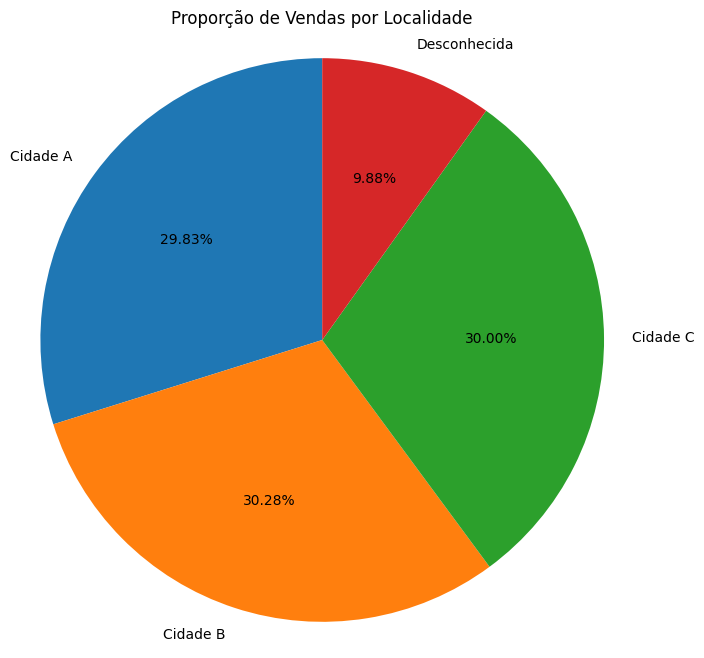

In [66]:
import matplotlib.pyplot as plt

data['total_vendas'] = data['Preço'] * data['Quantidade Vendida']

vendas_por_localidade = data.groupby('Localidade')['total_vendas'].sum()

plt.figure(figsize=(8,8))
plt.pie(vendas_por_categoria, labels=vendas_por_localidade.index, autopct='%1.2f%%', startangle=90)
plt.title('Proporção de Vendas por Localidade')
plt.axis('equal')
plt.show()

# 6. Identificação de Tendências

Qual categoria de produto vende mais:

In [78]:
vendas_por_produto = data.groupby('Produto')['total_vendas'].sum()
vendas_por_produto

Produto
Produto A    233740378.0
Produto B    237308710.0
Produto C    234155743.0
Produto D    231112551.0
Name: total_vendas, dtype: float64

Qual localidade tem mais vendas:

In [79]:
vendas_por_localidade = data.groupby('Localidade')['total_vendas'].sum()
vendas_por_localidade

Localidade
Cidade A        310145572.0
Cidade B        314800733.0
Cidade C        311897470.0
Desconhecida    102696231.0
Name: total_vendas, dtype: float64

Qual método de pagamento tem mais vendas:

In [80]:
vendas_por_metodo_pagamento = data.groupby('Método de Pagamento')['total_vendas'].sum()
vendas_por_metodo_pagamento

Método de Pagamento
Cartão de Crédito    235254677.0
Dinheiro             235239420.0
Invalido             103694189.0
Pix                  233641166.0
Transferência        231710554.0
Name: total_vendas, dtype: float64

Se há sazonalidade nas vendas:

In [90]:
data['Data de venda'] = pd.to_datetime(data['Data de venda'])

# Agrupar as vendas por mês
vendas_por_mes = data.groupby(pd.Grouper(key='Data de venda', freq='ME'))['Total Vendas'].sum().reset_index()

# Formatar a coluna 'Data de venda' para 'yyyy-mm-dd'
vendas_por_mes['Data de venda'] = vendas_por_mes['Data de venda'].dt.strftime('%Y-%m-%d')

# Criar uma nova coluna para identificar a estação
def identificar_estacao(data):
    mes = data.month
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

# Aplicar a função para adicionar a coluna de estação
vendas_por_mes['Estação'] = pd.to_datetime(vendas_por_mes['Data de venda']).apply(identificar_estacao)
vendas_por_mes['Estação']

0     Primavera
1     Primavera
2     Primavera
3         Verão
4         Verão
5         Verão
6        Outono
7        Outono
8        Outono
9       Inverno
10      Inverno
11      Inverno
12    Primavera
Name: Estação, dtype: object